In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df1 = pd.read_csv('Analyst_Test_ Tapestry_appts .csv')
df1.head()

,Appt ID,LVN (nurse),Patient ID,Appt date,Appt category
0,JOB-20294,Elisa Beltran,66388960.0,1/2/18 9:00,HC20 - FA
1,JOB-20212,Carla Mateos,64657536.0,1/2/18 9:10,HC20 - FA
2,JOB-20852,Elsa Garza,70353028.0,1/2/18 9:20,HC20 - FA
3,JOB-19470,Sofia Trujillo,62945322.0,1/2/18 10:00,HC20 - FA
4,JOB-20703,Elisa Beltran,62620150.0,1/2/18 10:20,HC20 - FA


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 5 columns):
Appt ID          2668 non-null object
LVN (nurse)      2663 non-null object
Patient ID       2663 non-null float64
Appt date        2663 non-null object
Appt category    2663 non-null object
dtypes: float64(1), object(4)
memory usage: 104.4+ KB


In [18]:
df1.isnull().sum()

Appt ID          1
LVN (nurse)      6
Patient ID       6
Appt date        6
Appt category    6
dtype: int64

In [15]:
df1.dropna(axis=0, inplace = True)

In [16]:
df1.isnull().sum()

Appt ID          0
LVN Name         0
Patient ID       0
Appt date        0
Appt category    0
dtype: int64

In [9]:
df1['LVN (nurse)'].value_counts()

Elvira Polanco       348
Carla Mateos         335
Elisa Beltran        327
Elsa Garza           316
Andrea Almador       304
Ken Armas            289
Gilda Gomez          256
Sofia Trujillo       172
Hector Adrade        102
Katy Ezo              84
Haracio Camarilla     73
Maria Dolores         57
Name: LVN (nurse), dtype: int64

In [10]:
df1.rename(columns ={'LVN (nurse)': 'LVN Name'}, inplace=True)

In [17]:
df1[sorted(df1)]

,Appt ID,Appt category,Appt date,LVN Name,Patient ID
0,JOB-20294,HC20 - FA,1/2/18 9:00,Elisa Beltran,66388960.0
1,JOB-20212,HC20 - FA,1/2/18 9:10,Carla Mateos,64657536.0
2,JOB-20852,HC20 - FA,1/2/18 9:20,Elsa Garza,70353028.0
3,JOB-19470,HC20 - FA,1/2/18 10:00,Sofia Trujillo,62945322.0
4,JOB-20703,HC20 - FA,1/2/18 10:20,Elisa Beltran,62620150.0
...,...,...,...,...,...
2658,JOB-32014,HC20 - FA,6/29/18 15:40,Elvira Polanco,75421440.0
2659,JOB-32417,HC20 - FA,6/29/18 15:40,Haracio Camarilla,70351064.0
2660,JOB-32025,HC20 - FA,6/29/18 15:50,Hector Adrade,73803966.0
2661,JOB-32448,LVN only,6/29/18 16:00,Andrea Almador,72873288.0


In [51]:
df2 = pd.read_csv('Analyst_test_Tapestry_LVN Hours Worked.csv')
df2.head()

,LVN Name,Date,Hours Worked
0,Elvira Polanco,01/02/18,8
1,Elvira Polanco,01/03/18,8
2,Elvira Polanco,01/04/18,8
3,Elvira Polanco,01/05/18,8
4,Elvira Polanco,01/08/18,8


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 3 columns):
LVN Name        1086 non-null object
Date            1086 non-null object
Hours Worked    1086 non-null int64
dtypes: int64(1), object(2)
memory usage: 25.6+ KB


In [6]:
df2['LVN Name'].value_counts()

Elisa Beltran        126
Elvira Polanco       126
Andrea Almador       126
Katy Ezo             126
Carla Mateos         126
Elsa Garza           126
Sofia Trujillo       126
Gilda Gomez           70
Hector Adrade         70
Ken Armas             26
Maria Dolores         19
Haracio Camarilla     19
Name: LVN Name, dtype: int64

In [14]:
new_df = pd.merge(df1,df2, how='left', on='LVN Name')
new_df.head()

,Appt ID,LVN Name,Patient ID,Appt date,Appt category,Date,Hours Worked
0,JOB-20294,Elisa Beltran,66388960.0,1/2/18 9:00,HC20 - FA,1/2/2018,8.0
1,JOB-20294,Elisa Beltran,66388960.0,1/2/18 9:00,HC20 - FA,1/3/2018,8.0
2,JOB-20294,Elisa Beltran,66388960.0,1/2/18 9:00,HC20 - FA,1/4/2018,8.0
3,JOB-20294,Elisa Beltran,66388960.0,1/2/18 9:00,HC20 - FA,1/5/2018,8.0
4,JOB-20294,Elisa Beltran,66388960.0,1/2/18 9:00,HC20 - FA,1/8/2018,8.0


In [19]:
new_df['Appt date']

6/13/18 9:00     630
4/17/18 9:00     448
6/5/18 11:00     442
5/24/18 9:00     404
4/19/18 14:00    404
                ... 
6/18/18 10:25     19
6/5/18 13:50      19
6/19/18 13:10     19
6/20/18 9:25      19
6/21/18 10:25     19
Name: Appt date, Length: 2248, dtype: int64

In [20]:
new_df[sorted(new_df)]

,Appt ID,Appt category,Appt date,Date,Hours Worked,LVN Name,Patient ID
0,JOB-20294,HC20 - FA,1/2/18 9:00,1/2/2018,8,Elisa Beltran,66388960.0
1,JOB-20703,HC20 - FA,1/2/18 10:20,1/2/2018,8,Elisa Beltran,62620150.0
2,JOB-20858,HC20 - FA,1/2/18 13:45,1/2/2018,8,Elisa Beltran,66574162.0
3,JOB-20645,HC20 - FA,1/2/18 14:45,1/2/2018,8,Elisa Beltran,67130544.0
4,JOB-21181,LVN only,1/3/18 9:00,1/2/2018,8,Elisa Beltran,67755922.0
...,...,...,...,...,...,...,...
272675,JOB-32155,HC20 - FA,6/28/18 13:10,6/29/2018,8,Maria Dolores,75289360.0
272676,JOB-32153,HC20 - FA,6/28/18 14:50,6/29/2018,8,Maria Dolores,75360728.0
272677,JOB-32333,HC20 - FA,6/29/18 8:30,6/29/2018,8,Maria Dolores,71727156.0
272678,JOB-31489,LVN only,6/29/18 12:00,6/29/2018,8,Maria Dolores,75320886.0


In [45]:
new_df.head(60)

,Appt ID,LVN Name,Patient ID,Appt date,Appt category,Date,Hours Worked
0,JOB-20294,Elisa Beltran,66388960.0,2018-01-02 09:00:00,HC20 - FA,1/2/2018,8
1,JOB-20703,Elisa Beltran,62620150.0,2018-01-02 10:20:00,HC20 - FA,1/2/2018,8
2,JOB-20858,Elisa Beltran,66574162.0,2018-01-02 13:45:00,HC20 - FA,1/2/2018,8
3,JOB-20645,Elisa Beltran,67130544.0,2018-01-02 14:45:00,HC20 - FA,1/2/2018,8
4,JOB-21181,Elisa Beltran,67755922.0,2018-01-03 09:00:00,LVN only,1/2/2018,8
5,JOB-21028,Elisa Beltran,63175454.0,2018-01-03 10:00:00,HC20 - FA,1/2/2018,8
6,JOB-20317,Elisa Beltran,64595072.0,2018-01-03 11:30:00,HC20 - FA,1/2/2018,8
7,JOB-20286,Elisa Beltran,65379344.0,2018-01-03 13:35:00,HC20 - FA,1/2/2018,8
8,JOB-19798,Elisa Beltran,60884088.0,2018-01-04 09:30:00,HC20 - FA,1/2/2018,8
9,JOB-20300,Elisa Beltran,59958576.0,2018-01-04 11:15:00,HC20 - FA,1/2/2018,8


In [23]:
new_df.tail(20)

,Appt ID,LVN Name,Patient ID,Appt date,Appt category,Date,Hours Worked
272660,JOB-30067,Maria Dolores,71945680.0,6/21/18 10:25,HC20 - FA,6/29/2018,8
272661,JOB-31431,Maria Dolores,75288524.0,6/21/18 14:10,HC20 - FA,6/29/2018,8
272662,JOB-31754,Maria Dolores,75202818.0,6/21/18 16:00,HC20 - FA,6/29/2018,8
272663,JOB-31643,Maria Dolores,75300606.0,6/22/18 10:30,HC20 - FA,6/29/2018,8
272664,JOB-31651,Maria Dolores,75368300.0,6/22/18 13:00,LVN only,6/29/2018,8
272665,JOB-31562,Maria Dolores,75289178.0,6/22/18 15:00,HC20 - FA,6/29/2018,8
272666,JOB-31752,Maria Dolores,73180752.0,6/26/18 9:20,HC20 - FA,6/29/2018,8
272667,JOB-31967,Maria Dolores,75441780.0,6/26/18 10:30,LVN only,6/29/2018,8
272668,JOB-31471,Maria Dolores,70698032.0,6/26/18 12:40,HC20 - FA,6/29/2018,8
272669,JOB-31543,Maria Dolores,74948954.0,6/26/18 14:05,HC20 - FA,6/29/2018,8


In [25]:
new_df['Hours Worked'].value_counts()

8    225770
6     36326
2     10584
Name: Hours Worked, dtype: int64

In [26]:
new_df['Appt ID'].value_counts()

JOB-32151    252
JOB-25676    196
JOB-25360    196
JOB-25362    196
JOB-25487    196
            ... 
JOB-31593     19
JOB-31973     19
JOB-30971     19
JOB-32625     19
JOB-31489     19
Name: Appt ID, Length: 2594, dtype: int64

In [27]:
new_df.duplicated(subset =None, keep ='first')

0         False
1         False
2         False
3         False
4         False
          ...  
272675    False
272676    False
272677    False
272678    False
272679    False
Length: 272680, dtype: bool

In [29]:
new_df.groupby('Hours Worked').sum()

,Patient ID
Hours Worked,
2,7.642212e+11
6,2.542047e+12
8,1.583334e+13


In [33]:
hours_total = sum(new_df['Hours Worked'])
hours_total

2045284

In [34]:
num_worked_days = sum(new_df['Hours Worked'])/8
num_worked_days 

255660.5

In [37]:
# convert appt date datatype to datetime64
new_df['Appt date'] = new_df['Appt date'].astype('datetime64')

In [69]:
# Number of appt per month
num_appt_per_month =new_df['Appt date'].dt.month.value_counts().sort_index()
num_appt_per_month

1    39942
2    33166
3    44654
4    45884
5    51310
6    57724
Name: Appt date, dtype: int64

In [49]:
# Average hours per/worked_day
new_df['Hours Worked'].mean()

7.5006747836291625

In [68]:
workdays = pd.read_csv('Analyst_Test_ApptWorkdays.csv')
workdays.drop('Unnamed: 1', axis =1, inplace = True)
workdays.head()

,2018 Work Days,Name,Holidays
0,1/2/2018,MLK,01/15/18
1,1/3/2018,President,02/19/18
2,1/4/2018,Memorial,05/28/18
3,1/5/2018,NaN,NaN
4,1/8/2018,NaN,NaN


In [71]:
# convert appt date datatype to datetime64
workdays['2018 Work Days'] = workdays['2018 Work Days'].astype('datetime64')


In [72]:
num_workday_per_month = workdays['2018 Work Days'].dt.month.value_counts().sort_index()
num_workday_per_month

1    21
2    19
3    22
4    21
5    22
6    21
Name: 2018 Work Days, dtype: int64

In [109]:
num_appt_month = [i /(j*12*8 for i in num_appt_per_month and j in num_workday_per_month)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [81]:
avg_appt_per_LVN_per_day_Jan = num_appt_per_month[1]/(12*8*num_workday_per_month[1])
round(avg_appt_per_LVN_per_day_Jan)

20.0

In [82]:
avg_appt_per_LVN_per_day_Feb = num_appt_per_month[2]/(12*8*num_workday_per_month[2])
round(avg_appt_per_LVN_per_day_Feb)

18.0

In [83]:
avg_appt_per_LVN_per_day_Mar = num_appt_per_month[3]/(12*8*num_workday_per_month[3])
round(avg_appt_per_LVN_per_day_Mar)

21.0

In [84]:
avg_appt_per_LVN_per_day_Apr = num_appt_per_month[4]/(12*8*num_workday_per_month[4])
round(avg_appt_per_LVN_per_day_Mar)

21.0

In [85]:
avg_appt_per_LVN_per_day_May = num_appt_per_month[5]/(12*8*num_workday_per_month[5])
round(avg_appt_per_LVN_per_day_May)

24.0

In [86]:
avg_appt_per_LVN_per_day_Jun = num_appt_per_month[6]/(12*8*num_workday_per_month[6])
round(avg_appt_per_LVN_per_day_Jun)

29.0

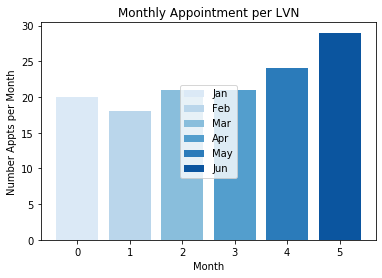

In [105]:
# Plot the average number of appointment per LVN per day in each month

x=['Jan','Feb','Mar','Apr','May','Jun']
y=[20,18,21,21,24,29]
sns.set_context(rc={"figure.figsize": (32, 48)})
nd = np.arange(6)
width=0.8
fig = plt.bar(nd, y, color=sns.color_palette("Blues",6))
plt.legend(fig, ['Jan','Feb','Mar','Apr','May','Jun'], loc = "center")
plt.xlabel('Month')
plt.ylabel('Number Appts per Month')
plt.title('Monthly Appointment per LVN')
plt.show()